In [1]:
import sys
sys.path.append('/opt/ASAP/bin')
import multiresolutionimageinterface as mir
reader = mir.MultiResolutionImageReader()
mr_image = reader.open('/disk2/Train_Tumor/Tumor_001.tif')
print(mr_image)

<Swig Object of type 'std::shared_ptr< MultiResolutionImage > *' at 0x7f24801cd650>


In [2]:
import wholeslidefilters as wsf
ndwsf = wsf.NucleiDetectionWholeSlideFilter()
ndwsf.setInput(mr_image)

In [23]:
ndwsf.setProcessedLevel(2)
ndwsf.setAlpha(2)
ndwsf.setBeta(0.01)
ndwsf.setThreshold(0.01)
ndwsf.setMaximumRadius(5.00)
ndwsf.setMinimumRadius(1.50)
ndwsf.setRadiusStep(1)
ndwsf.setOutput('/disk1/cell_work/ASAP_nuclei/nuclei.xml')

In [24]:
ndwsf.process()

True

In [21]:
len(ndwsf.getCenterPoints())

456045

In [16]:
text_file = open("nuclei.txt", "w")
for n in ndwsf.getCenterPoints():
    text_file.write(str(n)+'\n')
text_file.close()

In [22]:
ds = mr_image.getLevelDownsample(3)
image_patch = mr_image.getUCharPatch(int(ndwsf.getCenterPoints()[0][0])-32, int(ndwsf.getCenterPoints()[0][1])-32, 32, 32, 3)
from PIL import Image
result = Image.fromarray(image_patch)
result.save('result.jpg')

In [42]:
import numpy as np
(np.array(result).mean(0).mean(0) >200).astype(int).sum()

3

In [32]:
num_w, num_h = mr_image.getDimensions()[0]/512, mr_image.getDimensions()[1]/512

In [44]:
result_array

array([ 237.43240738,  237.12491989,  237.80374527])

In [47]:
for w in range(0,num_w):
    for h in range(0,num_h):
        image_patch = mr_image.getUCharPatch(w*512, h*512,512,512,0)
        result = Image.fromarray(image_patch)
        result_mean = np.array(result).mean(0).mean(0)
        if (result_mean> 200).astype(int).sum() == 0:
            result.save('./tumor_1/%d_%d.jpg'%(w,h))

KeyboardInterrupt: 

In [48]:
image_patch = mr_image.getUCharPatch(69319,122095,4213,6216,0)
result = Image.fromarray(image_patch)
result.save('%d_%d.jpg'%(1,1))

In [49]:
image_patch = mr_image.getUCharPatch(69319,122095,200,200,0)
result = Image.fromarray(image_patch)
result.save('%d_%d.png'%(1,2))

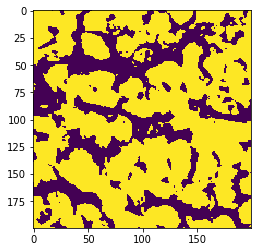

In [58]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('1_2.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
cv2.imwrite("result.png",thresh)
plt.imshow(thresh)
plt.show()

In [56]:
thresh.shape

(200, 200)

In [61]:
mr_image = reader.open('.tif')

In [62]:
mr_image

<Swig Object of type 'std::shared_ptr< MultiResolutionImage > *' at 0x7f642ce16b20>

In [3]:
w = mir.MultiResolutionImageWriter()
w.openFile("test_python.tif")
w.setTileSize(200)
w.setCompression(mir.LZW)
w.setDataType(mir.UChar)
w.setColorType(mir.RGB)
w.writeImageInformation(200,200)
a = mr_image.getUCharPatch(69319,122095,200,200,0 )
w.writeBaseImagePart(a.reshape(200, 200, 3)[:, :, ::-1].flatten())
w.finishImage()

0

In [ ]:
w.finishImage()

In [7]:
import numpy as np
a.astype(np.ubyte)

array([[[135,  71,  95],
        [116,  52,  76],
        [104,  42,  67],
        ..., 
        [165, 105, 139],
        [150,  92, 132],
        [139,  80, 124]],

       [[102,  45,  96],
        [ 87,  31,  78],
        [ 75,  22,  64],
        ..., 
        [162,  95, 130],
        [141,  73, 110],
        [127,  59,  96]],

       [[ 92,  38,  88],
        [ 79,  26,  70],
        [ 72,  22,  60],
        ..., 
        [147,  81, 117],
        [122,  56,  92],
        [112,  46,  82]],

       ..., 
       [[123,  70,  96],
        [129,  76,  96],
        [137,  84, 102],
        ..., 
        [215, 170, 191],
        [174, 126, 150],
        [152, 103, 125]],

       [[117,  64,  92],
        [120,  68,  90],
        [124,  72,  94],
        ..., 
        [193, 145, 171],
        [154, 104, 131],
        [144,  94, 123]],

       [[116,  61,  90],
        [118,  64,  90],
        [117,  62,  91],
        ..., 
        [184, 133, 164],
        [167, 113, 147],
        [157, 105,

In [ ]:
w.finishImage()

In [79]:
a.shape

(200, 200, 3)